# Wine Quality Analysis
<b>Author:</b> Przemyslaw Niedziela (przemyslaw.niedziela98@gmail.com) <br> 
<b>Date:</b> Jun 2024 <br>
<br> <br> 
<b> TL;DR </b> <br>
Detailed analysis and model training on a wine quality dataset have been conducted. An EDA was performed to understand the distribution and relationships of the features. The data was preprocessed by encoding categorical features and scaling numerical ones. The dataset was then split into training and testing sets. Three models, LinearRegression, DecisionTreeRegressor and RandomForestRegressor, were trained and evaluated. The performance of these models was assessed using standard perfomance metrics. Predictions on new data points were also demonstrated. Among the models, RandomForestRegressor showed the best performance due to its ability to handle non-linear relationships and interactions between features more effectively than LinearRegression or DecisionTreeRegressor. 
<br>
<br>
<b>Table of Contents:</b>
1. [Reading dataset](#reading-dataset)
2. [Basic EDA](#basic-exploratory-data-analysis)
3. [Feature Engineering](#feature-engineering)
4. [Modeling](#modeling)

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

### Reading dataset

In [2]:
wine_quality = pd.read_csv("winequalityN.csv")

In [3]:
wine_quality.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Basic exploratory data analysis

In [4]:
wine_quality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [5]:
wine_quality.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Distribution Plot of Wine Quality

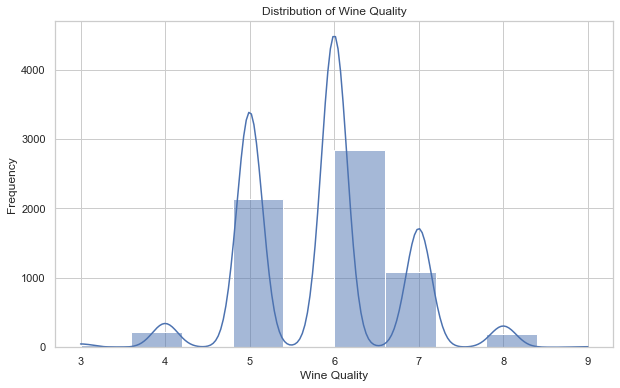

In [6]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(wine_quality['quality'], kde=True, bins=10)
plt.title('Distribution of Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Frequency')
plt.show()

Distributions of Chemical Propertie

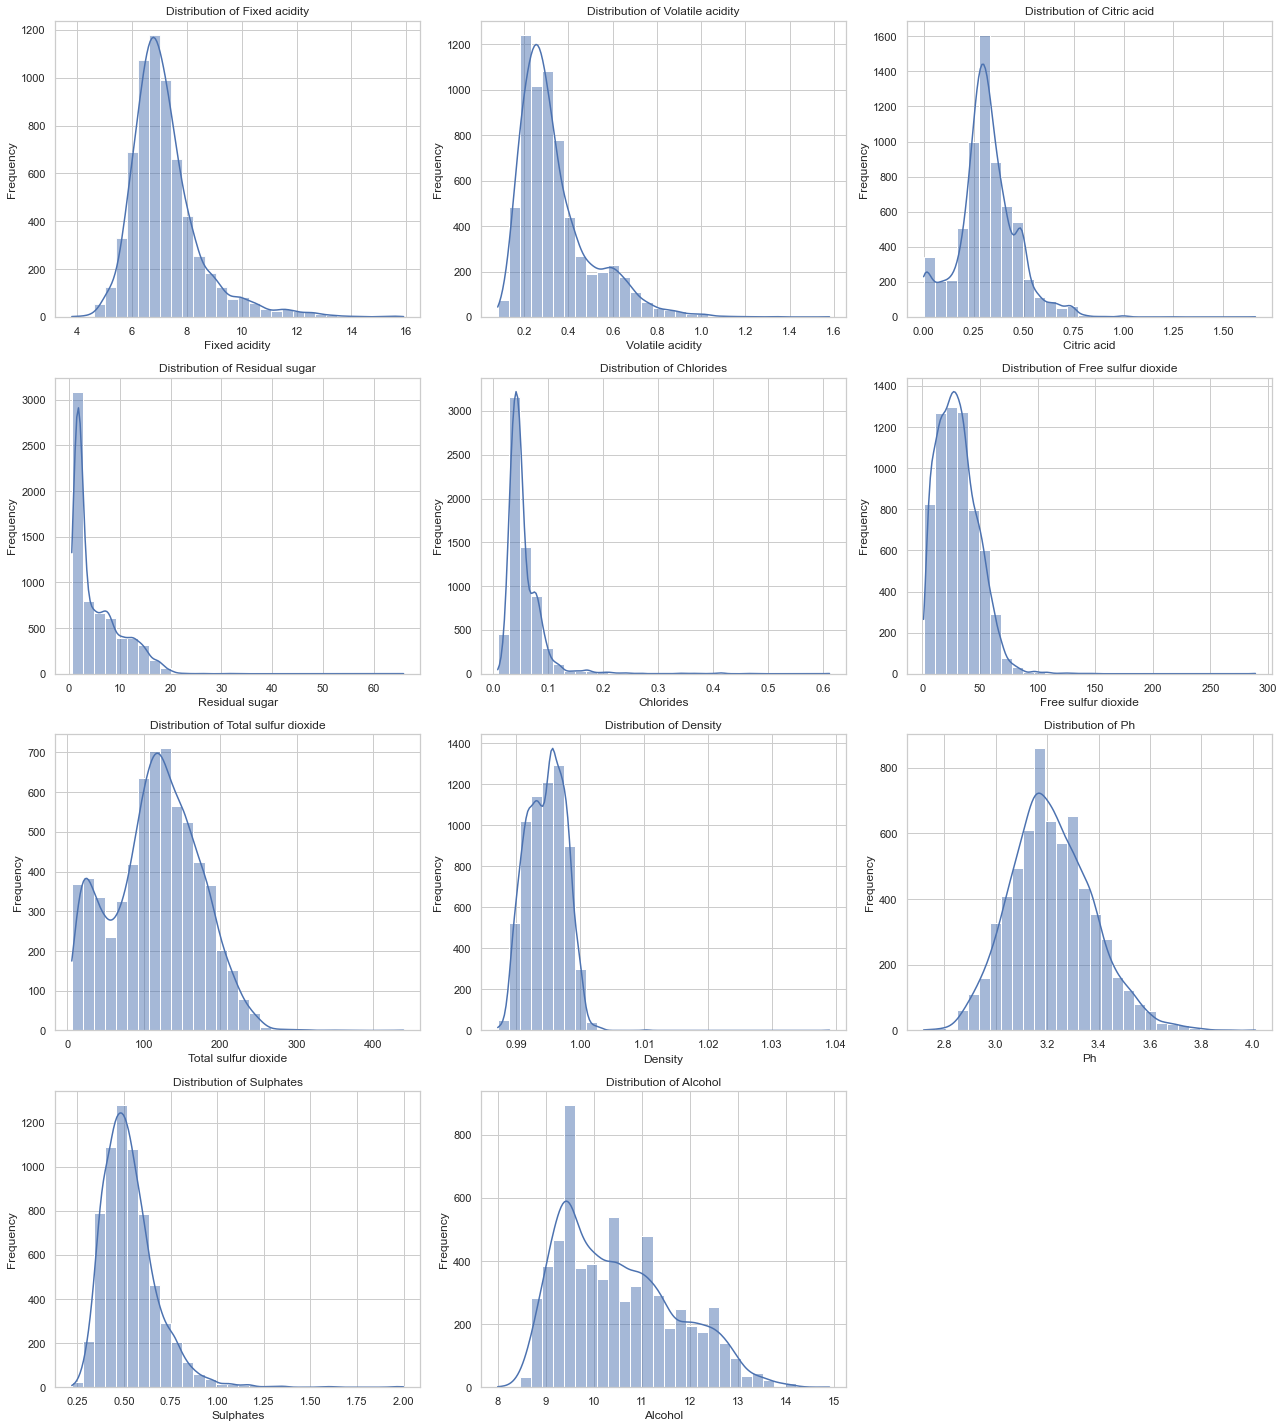

In [7]:
chemical_properties = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
                       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 20))
fig.delaxes(axes[3, 2])  

for ax, property in zip(axes.flat, chemical_properties):
    sns.histplot(wine_quality[property], kde=True, ax=ax, bins=30)
    ax.set_title(f'Distribution of {property.capitalize()}')
    ax.set_xlabel(property.capitalize())
    ax.set_ylabel('Frequency')

    plt.tight_layout()
plt.show()

Analysis of chemical properties by wine type

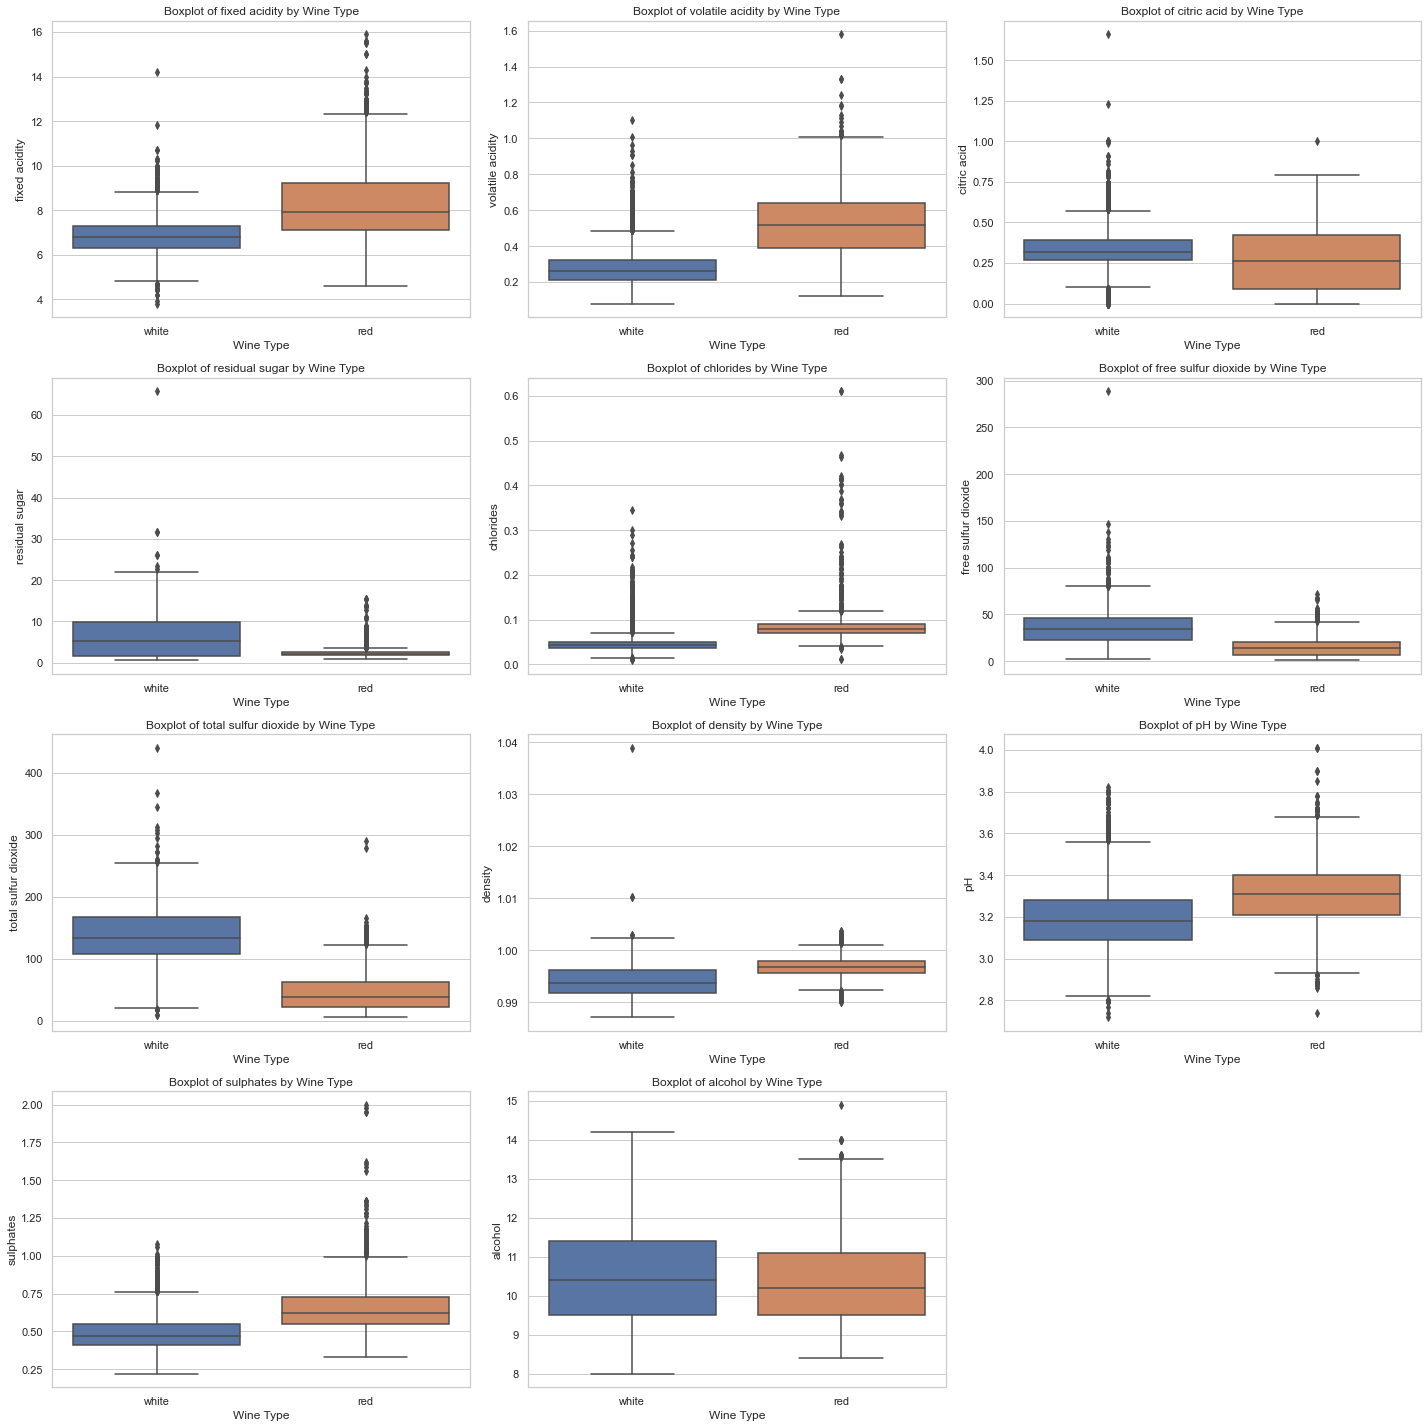

In [8]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 20)) 
axes = axes.flatten()

for i, property in enumerate(chemical_properties): 
    sns.boxplot(x='type', y=property, data=wine_quality, ax=axes[i]) 
    axes[i].set_title(f'Boxplot of {property} by Wine Type') 
    axes[i].set_xlabel('Wine Type') 
    axes[i].set_ylabel(property)

fig.delaxes(axes[-1]) 
plt.tight_layout()
plt.show()

Boxplots of Quality by Wine Type

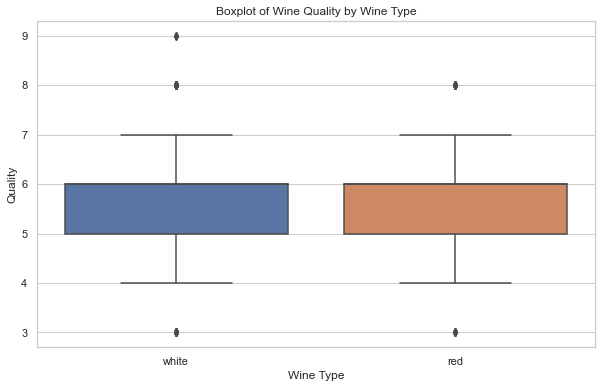

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='quality', data=wine_quality)
plt.title('Boxplot of Wine Quality by Wine Type')
plt.xlabel('Wine Type')
plt.ylabel('Quality')
plt.show()

Correlation Heatmap

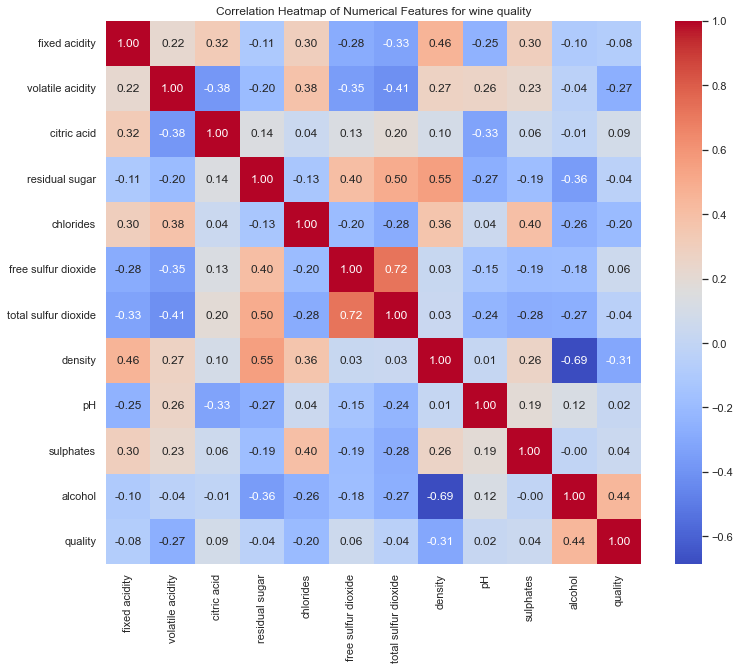

In [10]:
correlation_matrix = wine_quality.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Numerical Features for wine quality')
plt.show()

Pair plots for key features

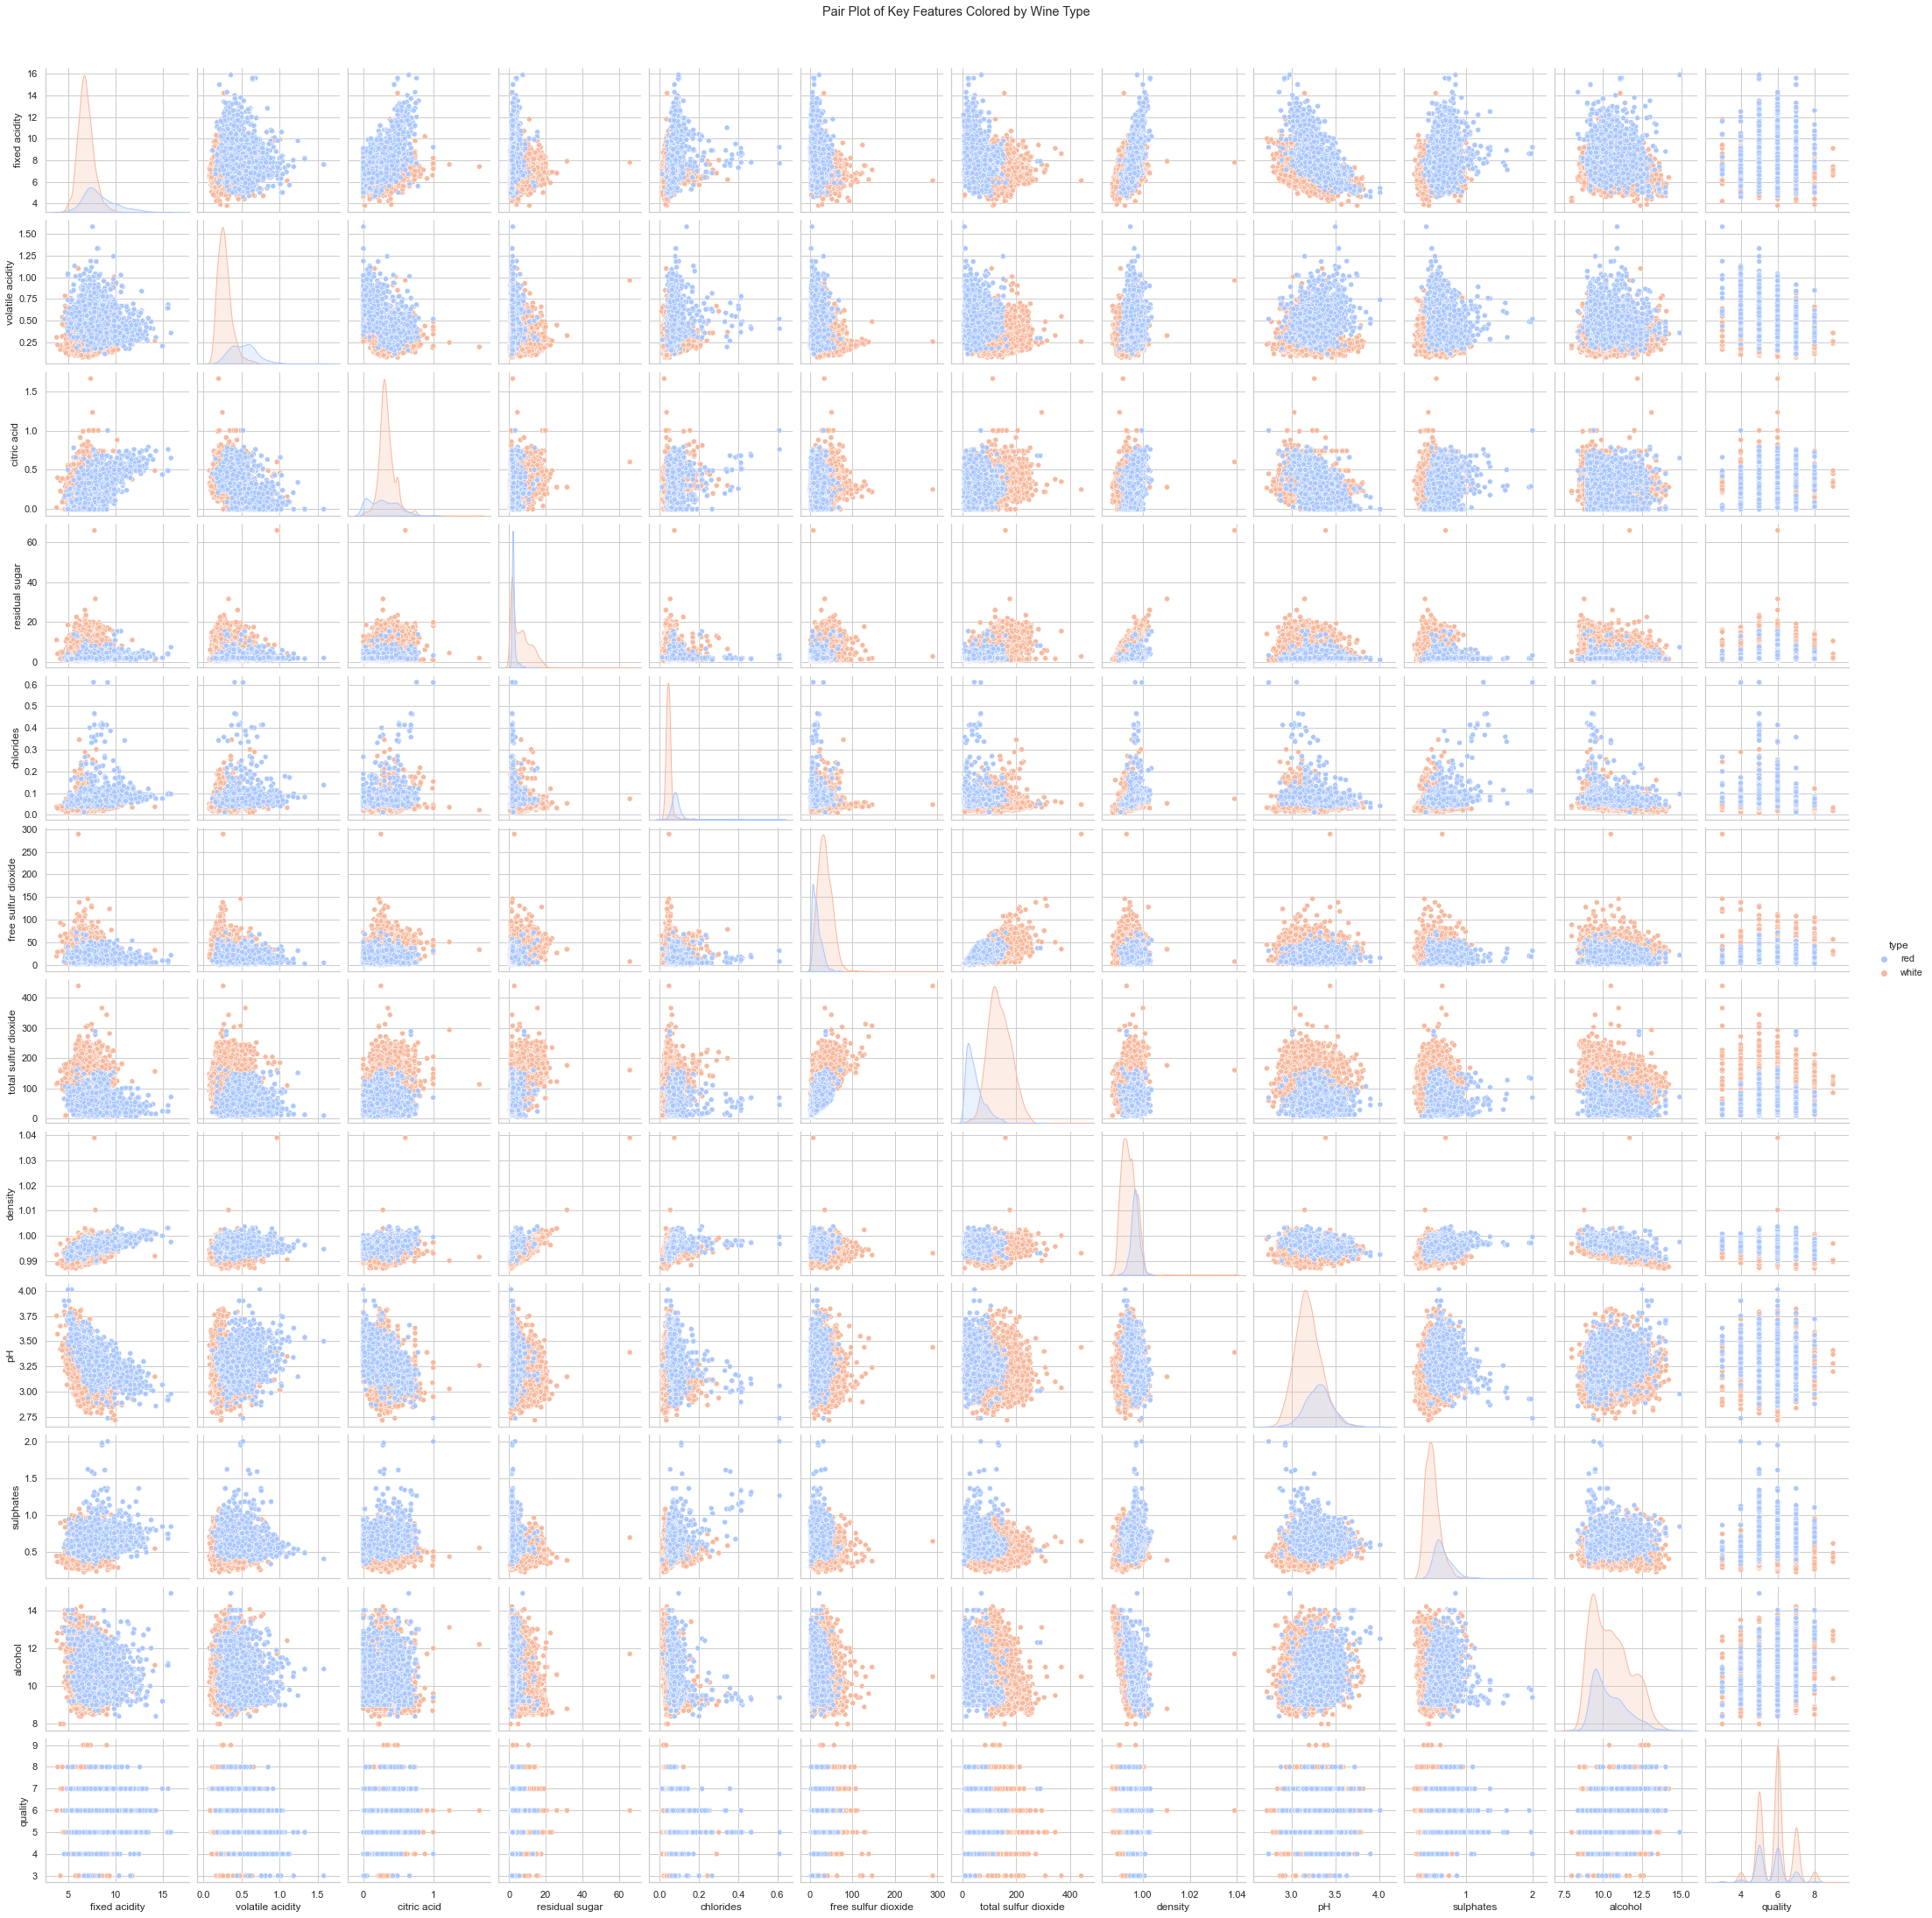

In [11]:
key_features_subset = [
    'fixed acidity', 'citric acid', 'residual sugar', 'alcohol', 'quality'
]
wine_quality_subset = wine_quality.dropna(subset=key_features_subset + ['type'])
wine_quality_subset['type'] = wine_quality_subset['type'].astype('category')

sns.pairplot(wine_quality_subset, hue='type', diag_kind='kde', palette='coolwarm')
plt.suptitle('Pair Plot of Key Features Colored by Wine Type', y=1.02)
plt.show()

Alcohol vs. quality

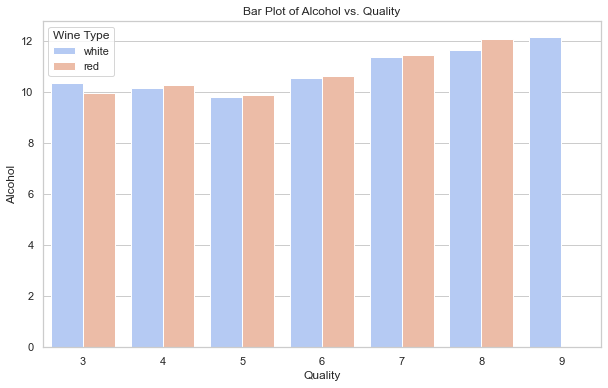

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(data=wine_quality, x='quality', y='alcohol', hue='type', palette='coolwarm', ci=None)
plt.title('Bar Plot of Alcohol vs. Quality')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.legend(title='Wine Type')
plt.show()

pH vs. quality

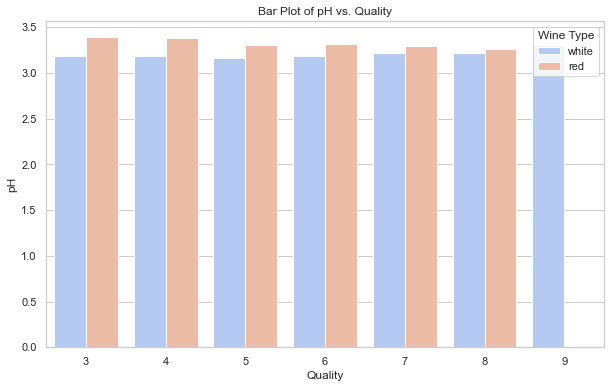

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(data=wine_quality, x='quality', y='pH', hue='type', palette='coolwarm', ci=None)
plt.title('Bar Plot of pH vs. Quality')
plt.xlabel('Quality')
plt.ylabel('pH')
plt.legend(title='Wine Type')
plt.show()

Chemical Properties by Quality

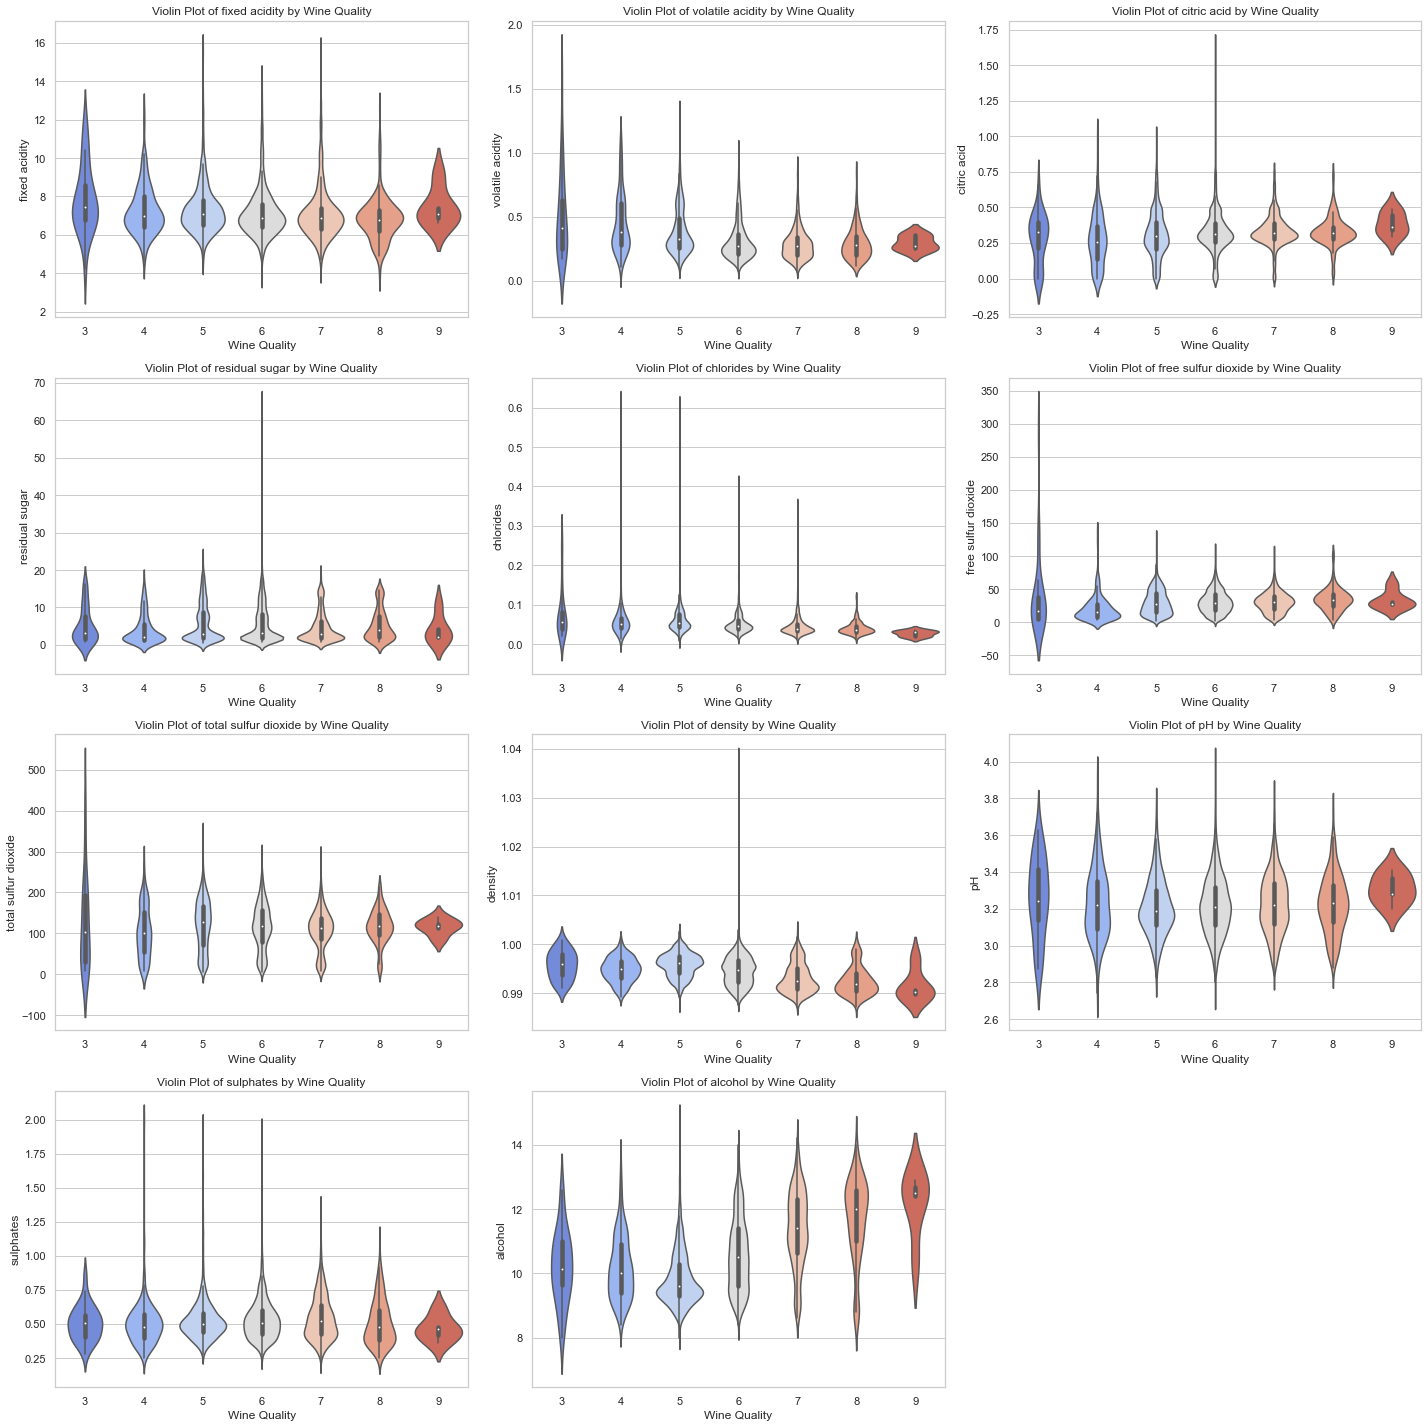

In [14]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
axes = axes.flatten()

for i, property in enumerate(chemical_properties):
    sns.violinplot(x='quality', y=property, data=wine_quality, ax=axes[i], palette='coolwarm')
    axes[i].set_title(f'Violin Plot of {property} by Wine Quality')
    axes[i].set_xlabel('Wine Quality')
    axes[i].set_ylabel(property)

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

Chemical Properties density plots

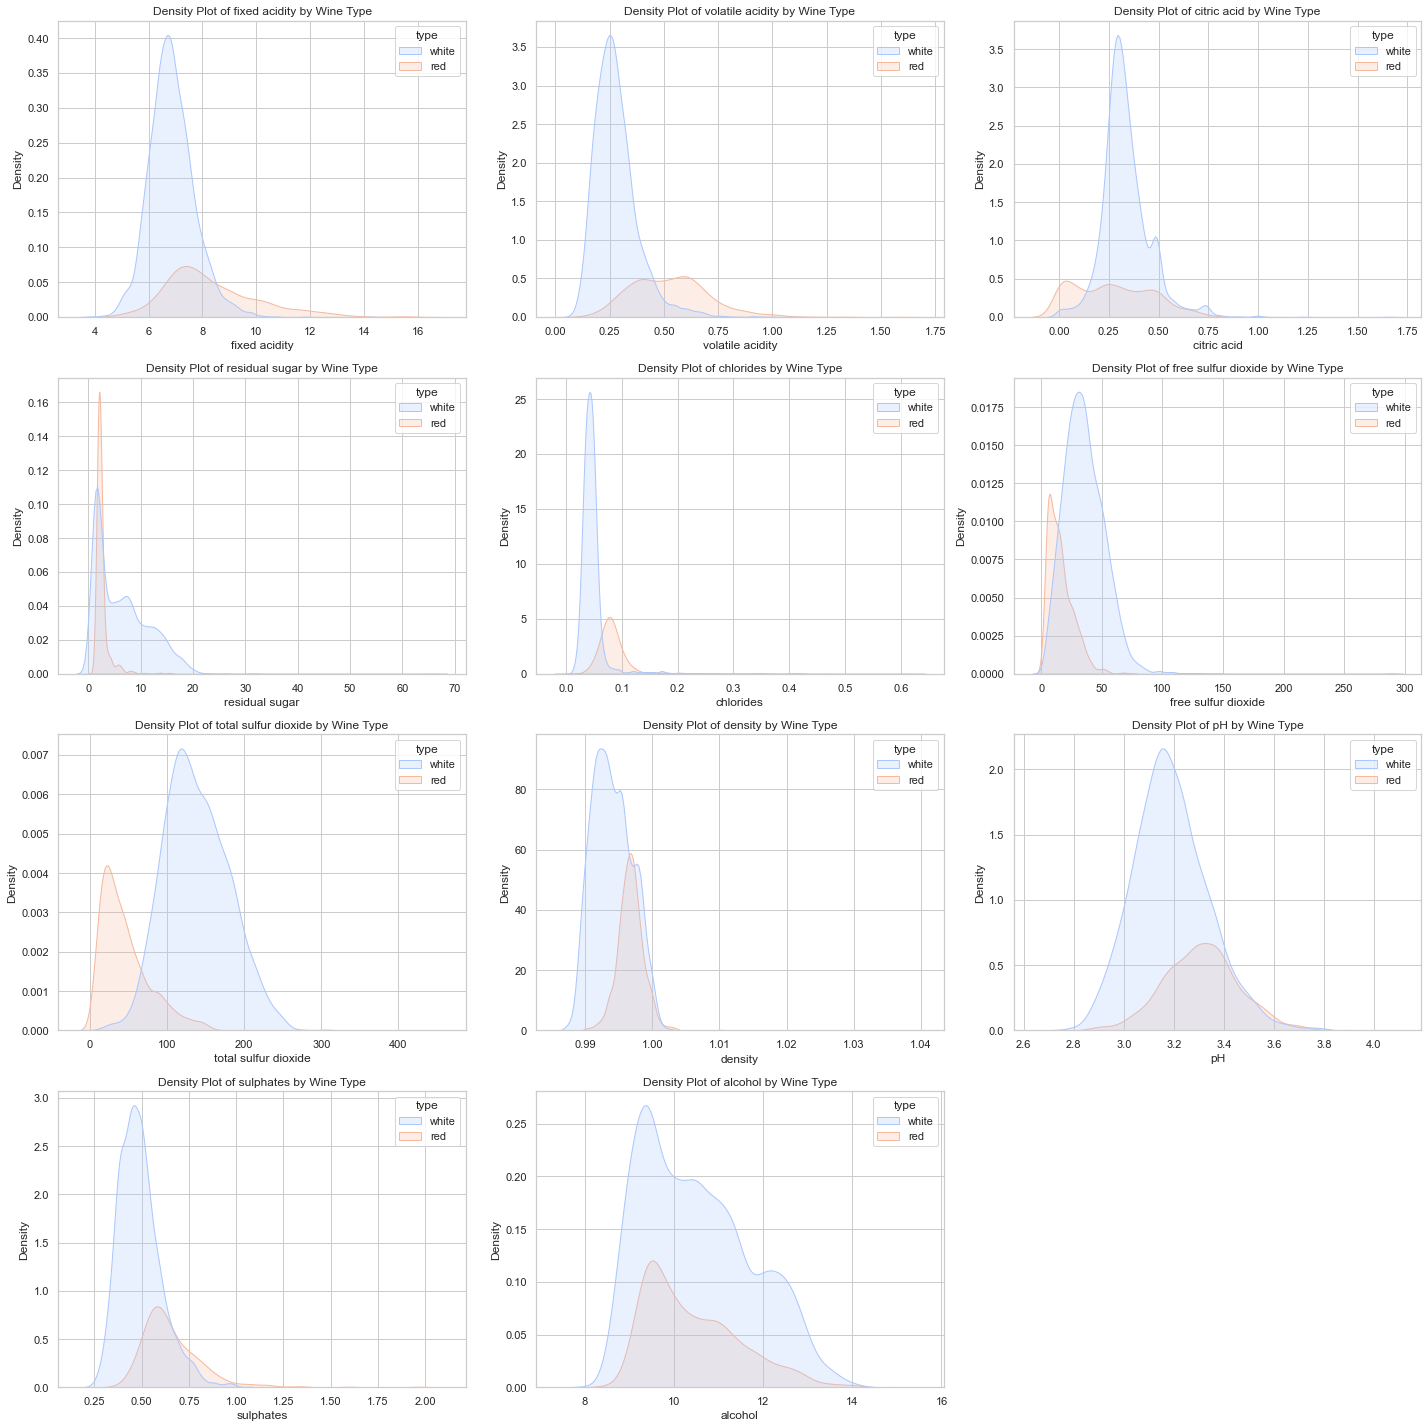

In [15]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
axes = axes.flatten()

for i, property in enumerate(chemical_properties):
    sns.kdeplot(data=wine_quality, x=property, hue='type', fill=True, ax=axes[i], palette='coolwarm')
    axes[i].set_title(f'Density Plot of {property} by Wine Type')
    axes[i].set_xlabel(property)
    axes[i].set_ylabel('Density')

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

### Feature engineering 
Missing values deep-dive

In [16]:
missing_values = wine_quality.isnull()

missing_df = missing_values[missing_values.any(axis=1)].stack().reset_index()
missing_df.columns = ['Row Number', 'Column', 'Missing']
missing_df = missing_df[missing_df['Missing'] == True]
missing_df

,Row Number,Column,Missing
1,17,fixed acidity,True
17,33,residual sugar,True
35,54,pH,True
41,86,volatile acidity,True
57,98,chlorides,True
74,139,pH,True
79,174,fixed acidity,True
101,224,sulphates,True
105,249,fixed acidity,True
118,267,fixed acidity,True


Showing rows with missing values

In [17]:
wine_quality[wine_quality.index.isin(missing_df["Row Number"])]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
17,white,NaN,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
33,white,6.2,0.120,0.34,NaN,0.045,43.0,117.0,0.99390,3.42,0.51,9.0,6
54,white,6.8,0.200,0.59,0.9,0.147,38.0,132.0,0.99300,NaN,0.38,9.1,6
86,white,7.2,NaN,0.63,11.0,0.044,55.0,156.0,0.99740,3.09,0.44,8.7,6
98,white,9.8,0.360,0.46,10.5,NaN,4.0,83.0,0.99560,2.89,0.30,10.1,4
139,white,8.1,0.280,0.39,1.9,0.029,18.0,79.0,0.99230,NaN,0.52,11.8,6
174,white,NaN,0.270,0.31,17.7,0.051,33.0,173.0,0.99900,3.09,0.64,10.2,5
224,white,6.3,0.495,0.22,1.8,0.046,31.0,140.0,0.99290,3.39,NaN,10.4,6
249,white,NaN,0.410,0.14,10.4,0.037,18.0,119.0,0.99600,3.38,0.45,10.0,5
267,white,NaN,0.580,0.07,6.9,0.043,34.0,149.0,0.99440,3.34,0.57,9.7,5


In [18]:
print(f"""Percent of rows with missing values: 
{round(missing_df['Row Number'].unique().shape[0]/wine_quality.shape[0] * 100,2)}%""")

Percent of rows with missing values: 
0.52%


Rows with missing values constitute less than 1% of the total rows. There is no visible pattern, suggesting that the missing values may be considered MAR (Missing at Random). Consequently, it can be assumed that the missing values do not carry significant information and can be safely dropped or filled.

Dropping missing values

In [19]:
filtered_wine_quality = wine_quality[~wine_quality.index.isin(missing_df["Row Number"].unique())].reset_index()

Checking for 6-sigma outliers

In [20]:
def get_six_sigma_outliers_and_variance(df):
    six_sigma_outliers = []
    
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        mean = df[column].mean()
        six_sigma_limit = 6 * df[column].std()
        outliers = df[(df[column] < (mean - six_sigma_limit)) | (df[column] > (mean + six_sigma_limit))]
        percent_outliers = (outliers.shape[0] / df.shape[0]) * 100
        
        six_sigma_outliers.append({
            'Feature': column,
            'Percent of 6-Sigma Outliers': percent_outliers,
            'Variance': df[column].var()
        })
    return pd.DataFrame(six_sigma_outliers)

get_six_sigma_outliers_and_variance(filtered_wine_quality)

,Feature,Percent of 6-Sigma Outliers,Variance
0,index,0.000000,3.496551e+06
1,fixed acidity,0.077363,1.684578e+00
2,volatile acidity,0.046418,2.710608e-02
3,citric acid,0.030945,2.109822e-02
4,residual sugar,0.015473,2.262764e+01
5,chlorides,0.433235,1.230313e-03
6,free sulfur dioxide,0.046418,3.153755e+02
7,total sulfur dioxide,0.000000,3.195272e+03
8,density,0.015473,9.008663e-06
9,pH,0.000000,2.580839e-02


6-sigma outliers from 0 to 0.5% of the total dataset volume for each feature

### Modeling

Encoding categorical feature (type: 1 - red; 2 - white)

In [21]:
data_encoded = filtered_wine_quality.copy()
data_encoded['type'] = data_encoded['type'].map({'red': 1, 'white': 2})

Min-max scaling

In [22]:
scaler = MinMaxScaler()
data_scaled = data_encoded.copy()
encoding_columns = data_encoded.drop('quality', axis = 1).columns
data_scaled[encoding_columns] = scaler.fit_transform(data_encoded[encoding_columns])

Train-test split

In [23]:
X = data_scaled.drop('quality', axis=1)
y = data_scaled['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

DecisionTreeRegressor

In [24]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}
dtr = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             scoring='neg_mean_squared_error')

In [25]:
print(f"Best params: {grid_search.best_params_}")

Best params: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [26]:
model_dtr = DecisionTreeRegressor(**grid_search.best_params_, random_state=42)
model_dtr.fit(X_train, y_train)
y_pred = model_dtr.predict(X_test)

Making correction of predictions (to match quality thresholds)

In [27]:
def replace_with_closest(y_pred, unique_values):
    return np.array([min(unique_values, key=lambda x: abs(x - pred)) for pred in y_pred])

y_pred_corrected = replace_with_closest(y_pred, y_train.unique())

Model performance

In [28]:
def print_performance_metrics(y_predicted):
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_predicted)}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_predicted)}")
    print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_predicted))}")
    print(f"R-squared (R²): {r2_score(y_test, y_predicted)}")
    
print_performance_metrics(y_pred_corrected)

Mean Absolute Error (MAE): 0.5220417633410673
Mean Squared Error (MSE): 0.6566125290023201
Root Mean Squared Error (RMSE): 0.8103163141652278
R-squared (R²): 0.17133529096495137


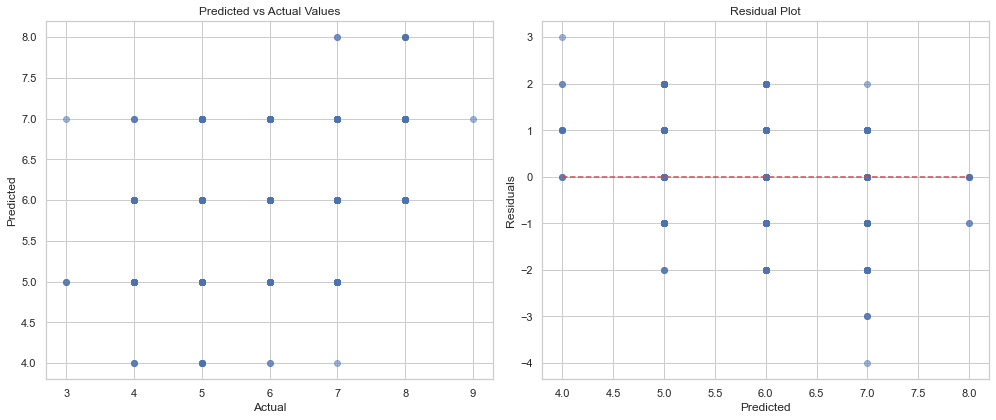

In [29]:
def plot_predictions_and_residuals(y_predicted):
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_predicted, alpha=0.5)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Predicted vs Actual Values')

    plt.subplot(1, 2, 2)
    plt.scatter(y_predicted, y_test - y_predicted, alpha=0.5)
    plt.hlines(y=0, xmin=y_predicted.min(), xmax=y_predicted.max(), colors='r', linestyles='--')
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.tight_layout()
    plt.show()
    
plot_predictions_and_residuals(y_pred_corrected)

Feature importance 

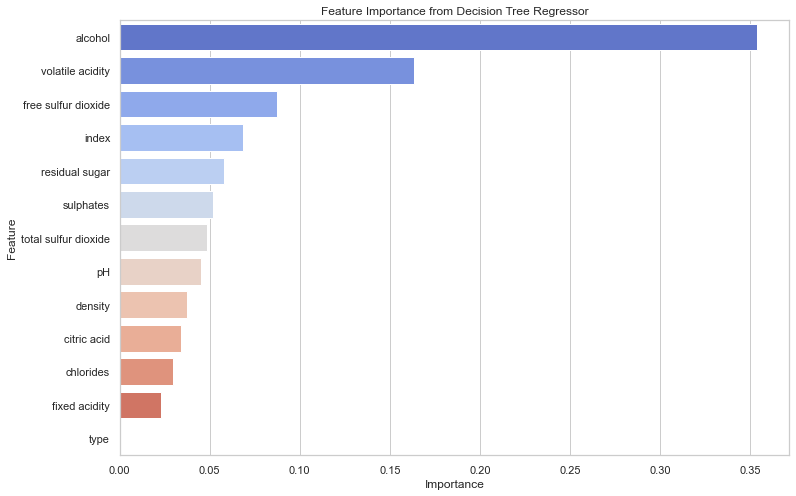

In [30]:
def plot_feature_importance(model):
    feature_importance_df = pd.DataFrame({"feature": X.columns,
                                          "importance": model.feature_importances_})\
                            .sort_values(by = "importance", ascending = False)
    
    plt.figure(figsize = (12,8))
    sns.barplot(x="importance", y="feature", data=feature_importance_df, palette='coolwarm')
    plt.title("Feature Importance from Decision Tree Regressor")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.show()
    
plot_feature_importance(model_dtr)

RandomForestRegressor

In [31]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5],
    'max_features': [None, 'sqrt', 'log2']
}

rf = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 10],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')

In [32]:
print(f"Best params: {grid_search_rf.best_params_}")

Best params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [33]:
model_rf = RandomForestRegressor(**grid_search_rf.best_params_, random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)
y_pred_rf_corrected = replace_with_closest(y_pred_rf, y_train.unique())

Model performance

In [34]:
print_performance_metrics(y_pred_rf_corrected)

Mean Absolute Error (MAE): 0.3565351894818252
Mean Squared Error (MSE): 0.419953596287703
Root Mean Squared Error (RMSE): 0.6480382676105656
R-squared (R²): 0.47000596347935053


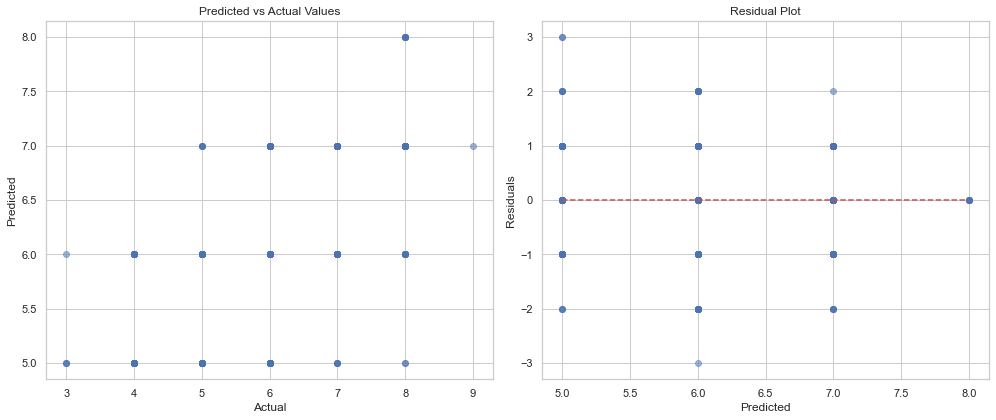

In [35]:
plot_predictions_and_residuals(y_pred_rf_corrected)

Feature importance

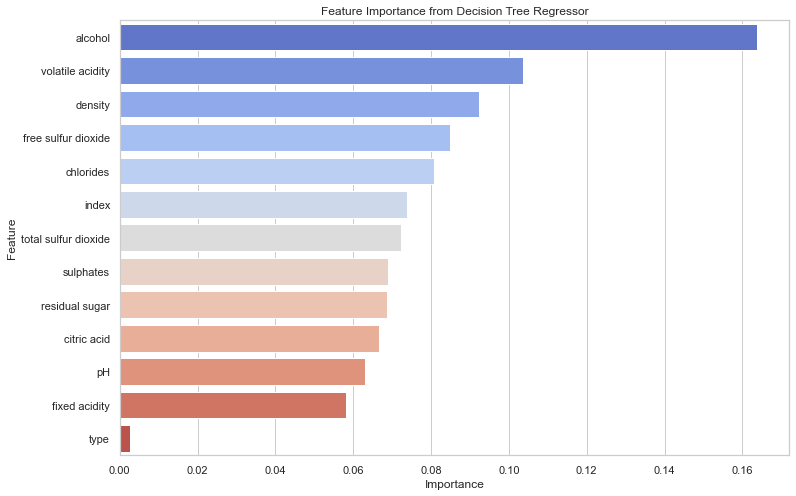

In [36]:
plot_feature_importance(model_rf)

Linear model

In [37]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred_lr = lr_model.predict(X_test)
y_pred_lr_corrected = replace_with_closest(y_pred_lr, y_train.unique())

In [39]:
print_performance_metrics(y_pred_lr_corrected)

Mean Absolute Error (MAE): 0.5104408352668214
Mean Squared Error (MSE): 0.6017014694508894
Root Mean Squared Error (RMSE): 0.7756941855208723
R-squared (R²): 0.2406346953718871


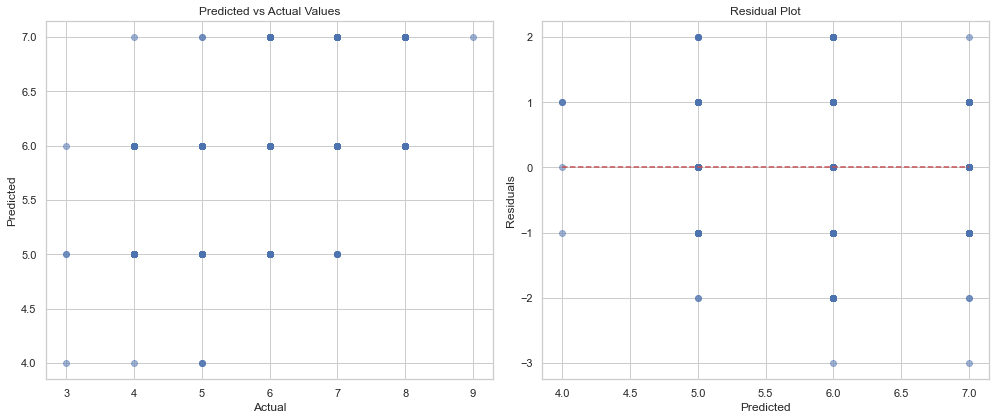

In [40]:
plot_predictions_and_residuals(y_pred_lr_corrected)

Checking models on unseen data

In [41]:
dummy_data = pd.DataFrame({
    'index': [0],
    'type': ["red"],  
    'fixed acidity': [7.0],
    'volatile acidity': [0.27],
    'citric acid': [0.36],
    'residual sugar': [20.7],
    'chlorides': [0.045],
    'free sulfur dioxide': [45.0],
    'total sulfur dioxide': [170.0],
    'density': [1.0010],
    'pH': [3.00],
    'sulphates': [0.45],
    'alcohol': [8.8]
})

In [42]:
def get_predicitons(data, model):
    data_encoded = data.copy()
    data_encoded['type'] = data_encoded['type'].map({'red': 1, 'white': 2})
    data_scaled = data_encoded.copy()
    data_scaled = scaler.transform(data_scaled)
    
    y_predicted = model.predict(data_scaled)
    return replace_with_closest(y_predicted, y_train.unique())[0]

In [43]:
print(f"Wine quality DecisionTree: {get_predicitons(dummy_data, model_dtr)}")

Wine quality DecisionTree: 5


In [44]:
print(f"Wine quality RandomForestRegressor: {get_predicitons(dummy_data, model_rf)}")

Wine quality DecisionTree: 6


In [45]:
print(f"Wine quality LinearRegression: {get_predicitons(dummy_data, lr_model)}")

Wine quality DecisionTree: 6
